In [1]:
# !pip install -r requirements.txt

import pandas as pd
from utils.LabelsDict import tickers
from utils.setup import setup_enviroment

setup_enviroment()

from utils.portfolio import Portfolio
from utils.logger import Logger
log = Logger(__name__)

In [2]:
# No Logger class to reset; handlers are cleared above if needed

# Define tickers list
tickers_list = [
    'GAZP', 'LKOH', 'ROSN',
    'SBER', 'VTBR', 'MOEX',
    'GMKN', 'NLMK', 'RUAL',
    'MTSS', 'RTKM', 'TTLK',
    'MGNT', 'FESH',  #LENT
]

# Recreate the Portfolio instance with the updated code
calc = Portfolio(
    dt_calc='2025-09-30',
    dt_start='2019-03-31',
    stocks_step=8,
    tickers_list=tickers_list
)
calc = calc.log_system_info()

2026-01-10 16:33:05,431:utils.portfolio:INFO: Configuration Parameters
Parameter                                                                                      Value
Calculation Date                                                                          2025-09-30
Start Date                                                                                2019-03-31
Stocks Step                                                                                        8
Tickers Count                                                                                     14
Tickers           GAZP, LKOH, ROSN, SBER, VTBR, MOEX, GMKN, NLMK, RUAL, MTSS, RTKM, TTLK, MGNT, FESH


In [3]:
# 2. Загрузка рыночных данных
calc = (
    calc
    .load_stock_data(
        use_backup_data=False,
        update_backup=False
    )
    .load_multipliers(
        use_backup=False,
        update_backup=False
    )
)

2026-01-10 16:33:05,454:utils.portfolio:INFO: Downloading all stock data from 2019-03-31 to 2025-09-30
2026-01-10 16:33:08,399:utils.load_data:INFO: Downloaded dates range for ticker GAZP : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:11,346:utils.load_data:INFO: Downloaded dates range for ticker LKOH : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:13,698:utils.load_data:INFO: Downloaded dates range for ticker ROSN : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:16,157:utils.load_data:INFO: Downloaded dates range for ticker SBER : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:18,423:utils.load_data:INFO: Downloaded dates range for ticker VTBR : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:20,765:utils.load_data:INFO: Downloaded dates range for ticker MOEX : [2019-04-01 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 16:33:23,444:utils.load_data:INFO: Downloaded dates range for ticker GMKN : [2019-04-01 00:00:00 - 2

In [4]:
calc = (
    calc
    .load_macro_data(
        update_inflation=False,
        update_rub_usd=False,
        update_unemployment=False
    )
    .create_portfolio()
    .add_dynamic_features()
    .add_merton_pd()
)

2026-01-10 16:33:52,893:utils.portfolio:INFO: Loaded Unemployment data from backup
2026-01-10 16:33:52,901:utils.portfolio:INFO: Loaded Unemployment Data Period
Start Date    End Date
2019-03-31  2025-09-30
2026-01-10 16:33:52,924:utils.portfolio:INFO: Loaded inflation data from backup
2026-01-10 16:33:52,930:utils.portfolio:INFO: Loaded Inflation Data Period
Start Date    End Date
2019-03-31  2025-09-30
2026-01-10 16:33:52,934:utils.portfolio:INFO: Loaded USD/RUB exchange rate from backup
2026-01-10 16:33:52,947:utils.portfolio:INFO: Loaded USD/RUB Exchange Rate Period
Start Date    End Date
2019-03-31  2025-09-30
2026-01-10 16:33:53,191:utils.portfolio:INFO: Portfolio Missing Values Before Filling
Column                    Value
P/E                      13.22%
Долг, млрд руб           49.53%
Капитализация, млрд руб  12.12%
Чистый долг, млрд руб    12.12%
debt                     31.78%
2026-01-10 16:33:53,257:utils.portfolio:INFO: Portfolio Missing Values After Filling
Column        

Solving Merton equations: 100%|██████████| 23355/23355 [01:09<00:00, 337.83it/s]

2026-01-10 16:35:02,456:utils.portfolio:INFO: Capital cost and capital volatility calculated.
2026-01-10 16:35:02,463:utils.portfolio:INFO: Merton's probabilities of default and distance to default calculated.


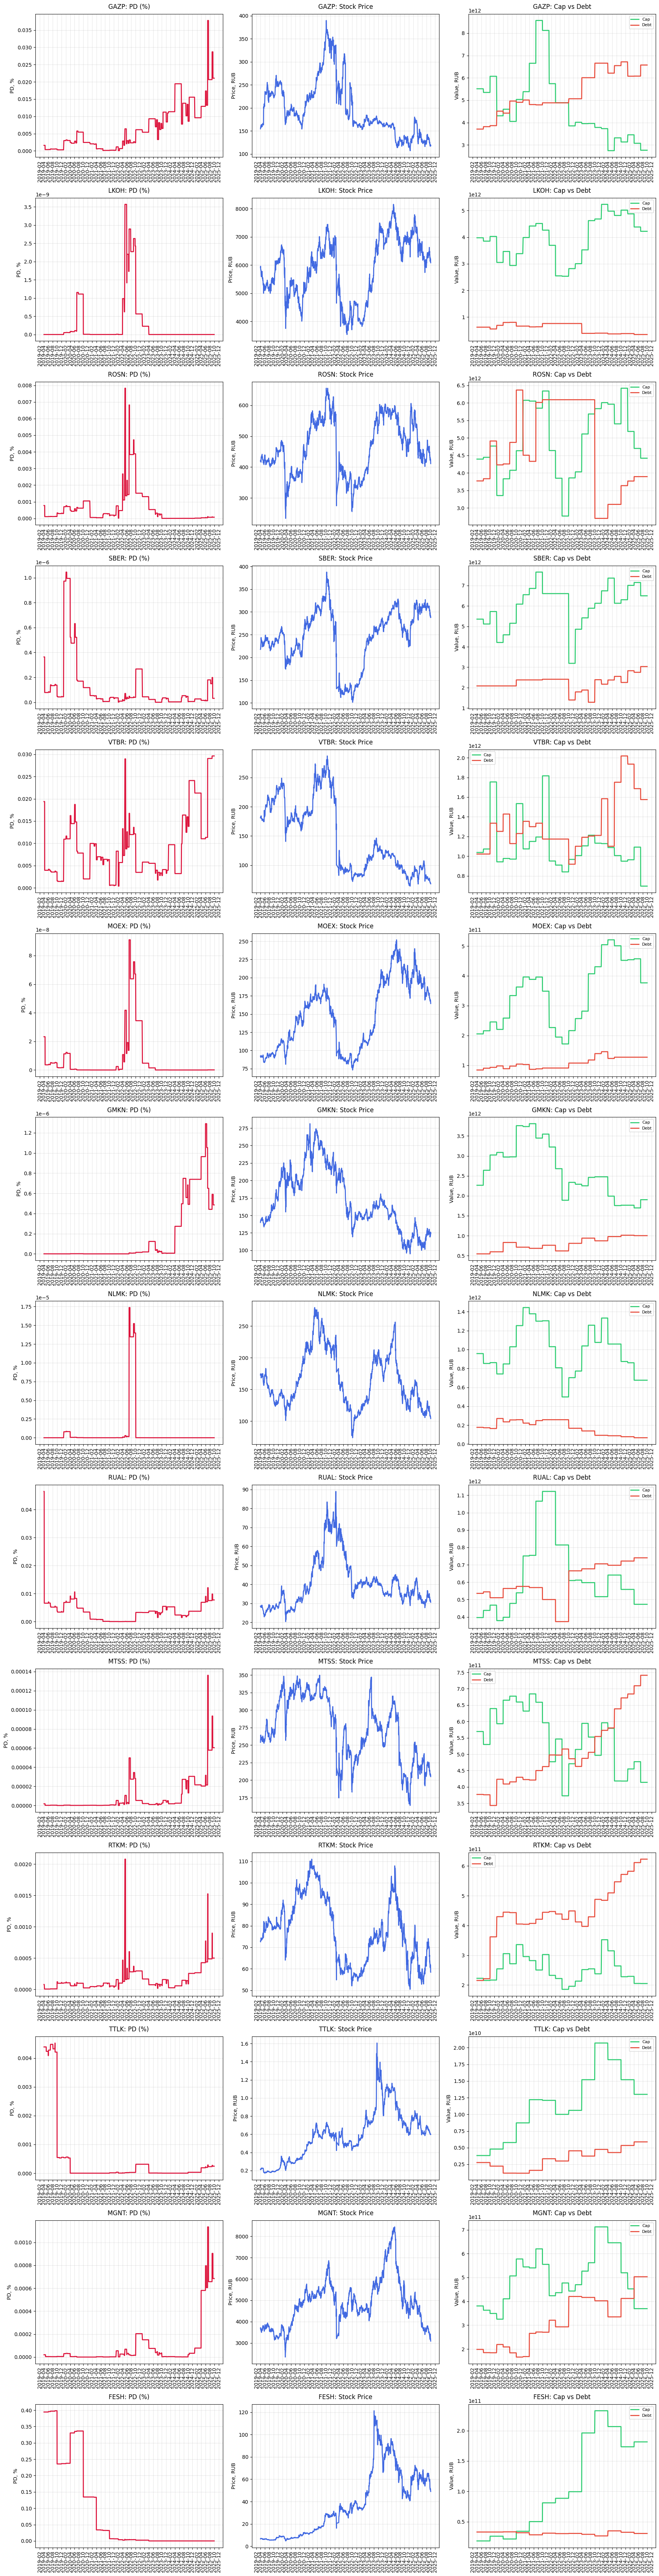

2026-01-10 16:35:42,258:utils.plots:INFO: Correlation matrix saved | Path: logs/graphs/corr_matrix.png


In [5]:
calc = (
    calc
    .plot_ticker_dashboards(tickers=tickers_list, verbose=True)
    .plot_correlation_matrix(custom_order = [                 # нарисовать матрицу корреляций
        'GAZP', 'LKOH', 'ROSN',                               # Нефтегазовая отрасль
        'SBER', 'VTBR', 'MOEX',                               # Финансовый сектор
        'GMKN', 'NLMK', 'RUAL',                               # Металлургия
        'MTSS', 'RTKM', 'TTLK',                               # Телекоммуникации
        'MGNT', 'LNTA', 'FESH'                                # Розничная торговля
    ], verbose=False)
)

2026-01-10 16:35:42,291:utils.portfolio:INFO: Visualizing Expanding Window backtest for last 3 months


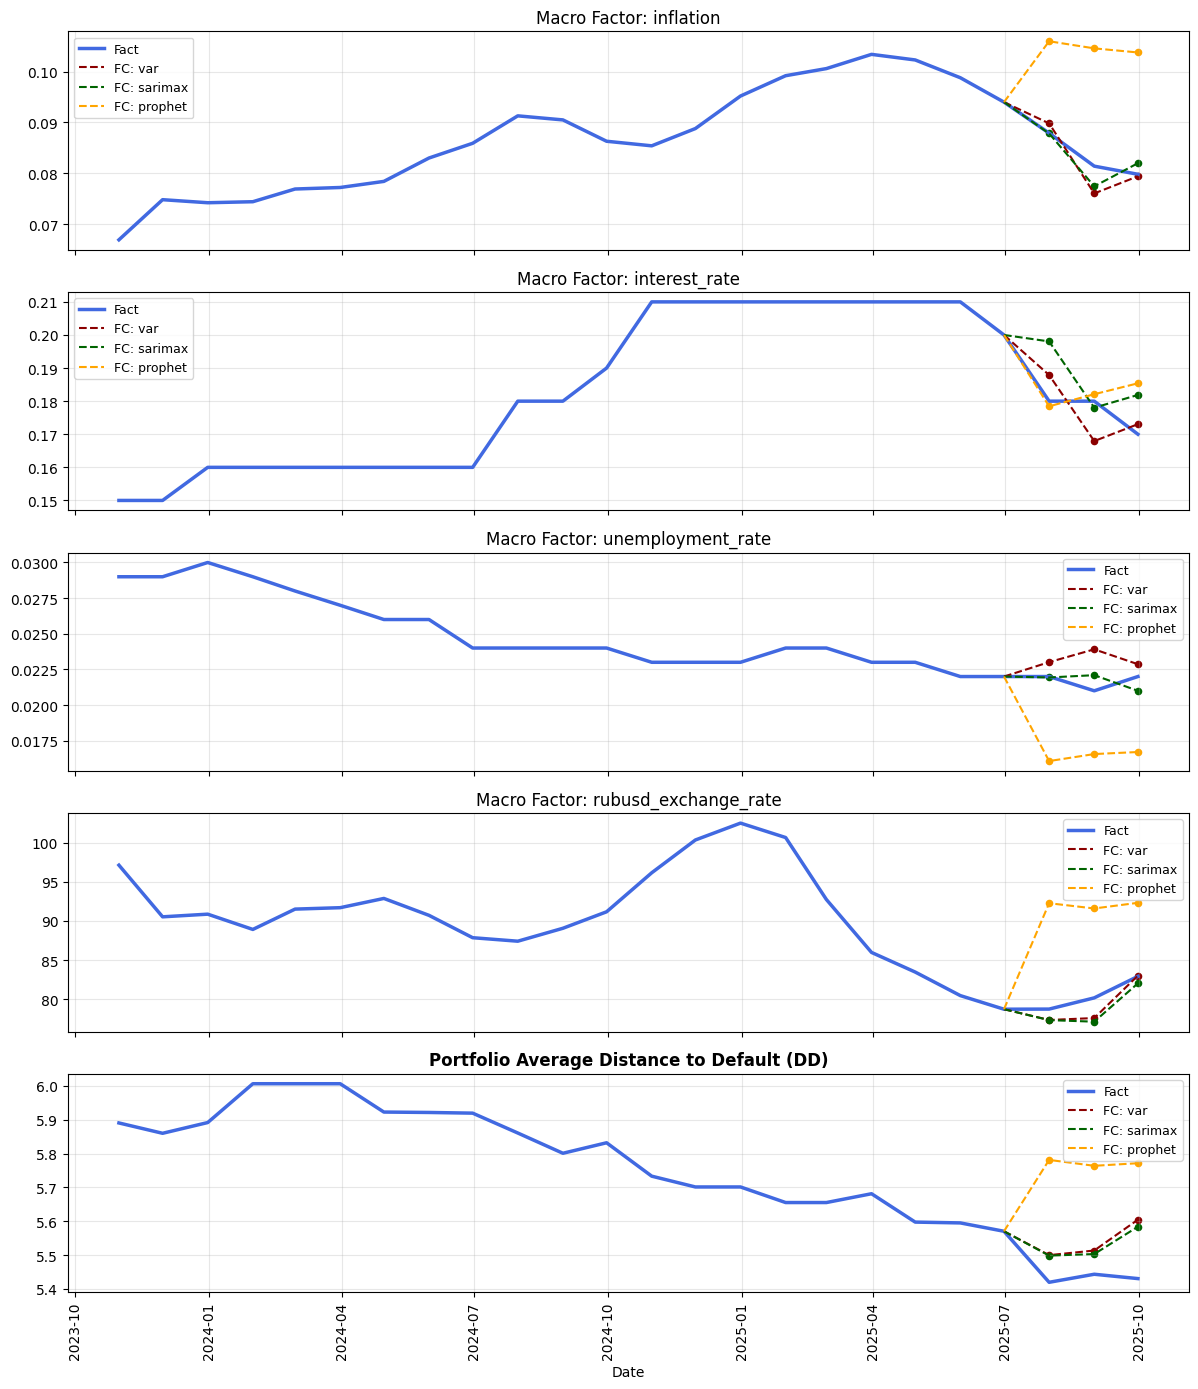

2026-01-10 16:36:12,083:utils.plots:INFO: Macro comparison plot saved: logs/graphs/macro_pd_comparison.png


In [6]:
# Вы можете передать список моделей ['var', 'sarimax', 'prophet'] для сравнения
# Теперь прогнозируется DD (Distance to Default) вместо PD для повышения стабильности OLS
calc = calc.plot_macro_forecast(
    horizon=-3,
    models=['var', 'sarimax', 'prophet'],
    target_col='DD',
    tail=24,
    verbose=True
)

In [7]:
# calc.calc_irf(impulses_responses = {                          # расчитать функции импульсного отклика
#     'inflation': 'PD', 'interest_rate': 'PD',
#     'rubusd_exchange_rate': 'PD', 'unemployment_rate': 'PD'
# }, verbose=True)
# calc.calc_macro_connections()                                 # расчитать регрессию для макропараметров
# calc.log_completion()                                         # вывести в лог сообщение об окончании расчета